<a href="https://colab.research.google.com/github/klajosw/python/blob/master/klajosw_r_pelda01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Jupiter 'R' nyelvú használat

## Kerner tipusok

In [2]:
!jupyter-kernelspec list

Available kernels:
  ir         /usr/local/share/jupyter/kernels/ir
  python2    /usr/local/share/jupyter/kernels/python2
  python3    /usr/local/share/jupyter/kernels/python3
  swift      /usr/local/share/jupyter/kernels/swift


In [7]:
!/swift/toolchain/usr/bin/swift --version
!python3 /swift/swift-jupyter/register.py

Swift version 5.1.1-dev (Swift 7b97b0ced0)
Target: x86_64-unknown-linux-gnu
usage: register.py [-h] [--kernel-name KERNEL_NAME]
                   [--user | --sys-prefix | --prefix PREFIX]
                   (--swift-toolchain SWIFT_TOOLCHAIN | --swift-build SWIFT_BUILD | --xcode-path XCODE_PATH)
                   [--swift-python-version SWIFT_PYTHON_VERSION | --swift-python-library SWIFT_PYTHON_LIBRARY | --swift-python-use-conda]
                   [--use-conda-shared-libs]
register.py: error: one of the arguments --swift-toolchain --swift-build --xcode-path is required


## IR az 'R' nyelv használahatóságát jelenti




### Betöltöttük a szükséges kiterjesztést.


In [8]:
%load_ext rpy2.ipython 

## Ez csak egyszerkell futtatni (osztály betöltés) FIGYI : Load sorba nem lehet semmi más még megjegyzés sem

The rpy2.ipython extension is already loaded. To reload it, use:
  %reload_ext rpy2.ipython


### Ezután már a nyelv %%R   jelzése után a r program értelmező fug futni

In [24]:
%%R                         ## FIGYI:  ez mindig kell ez mondja meg a colab-nak, hogy 'R' parancsértelmezőt használjon
a <- 50                    ## változó beállitása
b <- -1                    ## változó beállitása
print(a+b)                 ## kiiratás
c <- 1:2
d <- 1:3
c(c,d) 
getwd()                    ## munka könyvtár listázása, lapaértelemzésban "/content"




[1] 41
[1] "/content"


In [10]:
%%R                                  ## FIGYI:  ez mindig kell ez mondja meg a colab-nak, hogy 'R' parancsértelmezőt használjon
vilagegyenlet <- 42                  ## érték adás
vilagegyenlet <- round(3.1415) + 1   ## uj érték adás
print( factorial(vilagegyenlet) )    ## 24 (4 faktoriális)
rm(vilagegyenlet)                    ## objektum megszüntetése
#  print( vilagegyenlet   )          ## mivel már nincs meg az objektum hibát üzenne ezért megjegyzésbe tettem


##------------------------------Változó felül deffiniálás
pi          ## pi értéke : 3.141593 
pi <- 1     ## pi érték felüldeffiniálása pl 1-el   
print(pi)   ## pi változó értéke 1
rm(pi) 
print(pi)   ## pi érték visszaál az eredeti változó érték szerint 3.141593

## ---------------------------- Vectorok
vec <- c(1, 2, 3, 10, 100) 
vec                         ## 1   2   3  10 100

## ----------------------------mátrixok [ két dimenzios tomb]
# --- elemek 3x2 mátrixba töltése
mat <- matrix(c(1, 2, 3, 4, 5, 6), nrow = 2) 
print(mat )

#--- elemek  2x3 mátrixba töltése
mat <- matrix(c(1, 2, 3, 4, 5, 6), nrow = 3) 
print(mat )

## --transzláció (sor és oszlop felcserlése)
print(t(mat) )

[1] 24
[1] 1
[1] 3.141593
     [,1] [,2] [,3]
[1,]    1    3    5
[2,]    2    4    6
     [,1] [,2]
[1,]    1    4
[2,]    2    5
[3,]    3    6
     [,1] [,2] [,3]
[1,]    1    2    3
[2,]    4    5    6


In [0]:
%%R           ## FIGYI:  ez mindig kell ez mondja meg a colab-nak, hogy 'R' parancsértelmezőt használjon
vec <- c(1, 2, 3, 10, 100)   ## a vektor mindig csak azonos tipusu objektumokból állhat
print(vec + 4)
## -----
print(vec * 4)
## -----
print(vec * vec)
## -----
print(vec %*% vec)  ##  # inner 
## -----
print(vec %o% vec)  ##  # outer 


[1]   5   6   7  14 104
[1]   4   8  12  40 400
[1]     1     4     9   100 10000
      [,1]
[1,] 10114
     [,1] [,2] [,3] [,4]  [,5]
[1,]    1    2    3   10   100
[2,]    2    4    6   20   200
[3,]    3    6    9   30   300
[4,]   10   20   30  100  1000
[5,]  100  200  300 1000 10000


In [0]:
%%R                                  ## FIGYI:  ez mindig kell ez mondja meg a colab-nak, hogy 'R' parancsértelmezőt használjon
##  ----- három és több dimenziós tőmbök használata

array(c(1, 2, 3, 4, 5, 6), dim = c(2, 2, 3))




, , 1

     [,1] [,2]
[1,]    1    3
[2,]    2    4

, , 2

     [,1] [,2]
[1,]    5    1
[2,]    6    2

, , 3

     [,1] [,2]
[1,]    3    5
[2,]    4    6



In [0]:
%%R                                  ## FIGYI:  ez mindig kell ez mondja meg a colab-nak, hogy 'R' parancsértelmezőt használjon

print(class(0.00001) )
## --
print(class("hello") )

## --------  Szöveg műveletek
print(nchar("hello"))      # 5 
paste("hello", "world")    # "hello world"

## --------- faktorok
fac <- factor(c("a", "b", "c")) 
print(fac) 

## ------ listák
lst <- list(1, "R", TRUE) 
print(class(lst) )          ## a listák különböző tipusu elemekből is álhatnak
print (lst)

## ---- összetett lista
list(c(1, 2), TRUE, c("a", "b", "c"))

## ------ dataframe jellemzője, hogy mezőnként azonos tilusunak kellenie
df <- data.frame(c(1, 2, 3),   c("R","S","T"), c(TRUE, FALSE, TRUE)) 
class(df)



[1] "numeric"
[1] "character"
[1] 5
[1] a b c
Levels: a b c
[1] "list"
[[1]]
[1] 1

[[2]]
[1] "R"

[[3]]
[1] TRUE

[1] "data.frame"


## Adat megjelenitések, diagrammok

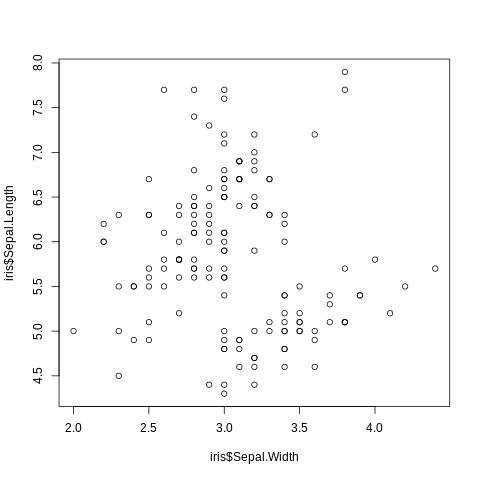

In [0]:
%%R                                  ## FIGYI:  ez mindig kell ez mondja meg a colab-nak, hogy 'R' parancsértelmezőt használjon
# install.packages("ggplot2")        ## Csak egyszerkell 
#library(ggplot2) 

#mpg 

#View(mpg) 

#qplot(displ, hwy, data = mpg)

plot(iris$Sepal.Width, iris$Sepal.Length)

# qplot(displ, hwy, data = mpg, color = class)

# qplot(displ, hwy, data = mpg) + facet_grid(. ~ cyl) 

#qplot(displ, hwy, data = mpg) + facet_grid(drv ~ .) 

#qplot(displ, hwy, data = mpg) + facet_grid(drv ~ cyl) 

#qplot(displ, hwy, data = mpg) + facet_wrap(~ class)

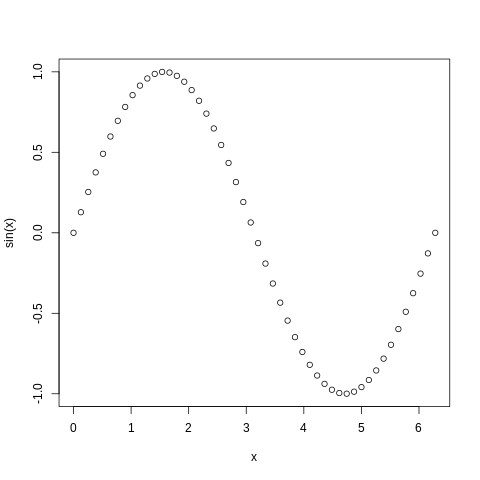

In [0]:
%%R                                  ## FIGYI:  ez mindig kell ez mondja meg a colab-nak, hogy 'R' parancsértelmezőt használjon

##   !apt-get -qq install -y libfluidsynth1   ## csak egyszerkell installálást futtatni
##  installed.packages()   ## az eddig installált csomagok listája
## install.packages("dplyr")


x <- seq(0, 2*pi, length.out=50)
plot(x, sin(x))






# Adat betöltés

### Tipus jelőlők:


```

read.csv(): comma separated 
read.delim(): tab separated
read.delim(sep = "|"): | separated 
read.fwf(): ﬁxed width

```




In [0]:
%%R                                  ## FIGYI:  ez mindig kell ez mondja meg a colab-nak, hogy 'R' parancsértelmezőt használjon

raw <- read.csv("data/pew.csv", check.names = F)
library(reshape2) 
tidy <- melt(raw, id = "religion")  
head(tidy)


tidy2 <- readRDS("tidy.rds")


tidy3 <- read.csv("tidy.csv.bz2") 





Error in file(file, "rt") : cannot open the connection


## Adat mentés állományba

In [0]:
%%R                                  ## FIGYI:  ez mindig kell ez mondja meg a colab-nak, hogy 'R' parancsértelmezőt használjon
getwd() 
write.csv(tidy, file = "tidy.csv",    row.names = FALSE) 

saveRDS(tidy, "tidy.rds")  ## rövid hivatkozás

write.csv(tidy, file = bzfile("tidy.csv.bz2"),    row.names = FALSE)  ## tömöritett állományba mentés

NULL
